<a href="https://colab.research.google.com/github/Hamza-t/Language-Identification/blob/main/Data_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hello!
In this notebook, we will validate our dataset before modeling.

The steps are 
1. Deep data cleaning :


*   Clean text : URL, emojis, punctuation (?,:!..) , symbols, newlines and Tabs ... ✊
*   Clean langages : validate language letters and convert numeric patterns to letters 🛑
*   Stop words : removing or keeping ❎

2. Data visualisation 🎨


In [ ]:
#Import data file 
#drive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#verify the path
folder_path = "/content/drive/MyDrive/My_work/NLP-Project-INSAT"
!ls "/content/drive/MyDrive/My_work/NLP-Project-INSAT"

 cleaned_data.csv	  'data collection '	      final_data.csv
'Data augmentation'	   Data_Preparation.ipynb    'General Data'
 Data_Augmentation.ipynb   Data_validation.ipynb      prepared_data.csv
 Data_cleaning.ipynb	   Data_visualization.ipynb


In [ ]:
##assign data path 
data_path = folder_path + "/" + "final_data.csv"

In [ ]:
#read data
import pandas as pd
data = pd.read_csv(data_path)
data = data[["text","label"]]
data.head()

,text,label
0,ana fil ghorba w sout el athan ahla haja 3ijbi...,3
1,man eheb rasoule mohamed,3
2,rabi yerhmou sofiane cha3ri,3
3,rabi yarahmak ya sbou3i wou yarham kol om mita,3
4,merci beaucoup salime,1


##Deep Data Cleaning

###1- Clean Text

In [ ]:
#import library
import re
import string
import unicodedata
from itertools import groupby

In [ ]:
data.dtypes

text     object
label     int64
dtype: object

In [ ]:
#Change the text data to string and the label data to int 
data['text'] = data['text'].astype('str')

In [ ]:
#remove emails
def remove_emails(x):
     return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)

#remove urls
def remove_urls(x):
    return re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)

#remove rt
def remove_rt(x):
    return re.sub(r'\brt\b', '', x).strip()

In [ ]:
#remove punctuation
def remove_special_chars(x):
    x = re.sub(r'[^\w ]+', "", x)
    x = ' '.join(x.split())
    return x

#remove accented chars
'''
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

'''

#remove extra space 
def remove_space(x):
  return re.sub(' +', ' ', x)

In [ ]:
#lower text
def lower_text(text):
    return text.lower()

In [ ]:
data["text"] = data.text.map(lower_text)
data["text"] = data.text.map(remove_urls)
data["text"] = data.text.map(remove_rt)
data["text"] = data.text.map(remove_emails)
data["text"] = data.text.map(remove_special_chars)
data["text"] = data.text.map(remove_space)

###2- Clean langages 
* french langage  : Ã© = é, Ã§ = ç, Ã = à, Å“ = oe, Ãª = Ã¨ = è, others  = e
* Tunizi/Code-switching :     
Check this notebook :    
https://github.com/faressoltani55/TunisianDialectSentimentAnalysis/blob/main/Tunisian_Dialect_Sentiment_Analysis_Model.ipynb

In [ ]:
#french langage : 
trans = {'Ã©' : 'é','Ã§' : 'ç', 'Ã' : 'à', 'Å“' : 'oe', 'Ãª':'è', 'Ã¨' : 'è', 'Ã¯':'y'}
def translate_special(text):
  text = text.replace("Ã©", "é")
  text = text.replace("Ã§", "ç")
  text = text.replace("Ãª", "è")
  text = text.replace("Å“", "oe")
  text = text.replace("Ã¨", "è")
  text = text.replace("Ã¯", "y")
  text = text.replace("Ã", "à")
  return text

In [ ]:
#using facebook chat : 
def convert_number(number):
      if number == "1" or number == "3":
        return "a"
      elif number == "2":
        return "e"
      elif number == "4":
        return "dh"
      elif number == "5":
        return "kh"
      elif number == "7":
        return "h"
      elif number == "8":
        return "gh"
      elif number == "9":
        return "k"

In [ ]:
#Tunizi number 
def remove_number(text):
  text  = list(text)
  for i in range(len(text)-1):
    if (text[i] in list("0987654321")) and (text[i+1] in list(string.ascii_lowercase)):
      text[i]  = convert_number(text[i])
  
  for i in range(1,len(text)):
    if text[i] in  list("0987654321") and (text[i-1] in list(string.ascii_lowercase)):
      text[i]  = convert_number(text[i])
  text  = [str(i) for i in text]
  return "".join(text)

In [ ]:
#apply to our text 
data["text"] = data.text.map(translate_special)
data["text"] = data.text.map(remove_number)

###3- Stop words
* First, we will search a list of stop words of tunizi langage, or create it! 

* What are the Stopwords in NLP?

* What are stop words? 🤔 The words which are generally filtered out before processing a natural language are called stop words. These are actually the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc) and does not add much information to the text

* As we mentioned, the stopwords are a bags of words in a language, an intersted bag of words!
* So we can't remove them if we will predict the langage of text 
* let's take an example:
text  = "Hamza is a clever person, mais he is stupid!"
* this text is a C-S text : english and french, if we remove the stopwords ( 'mais' is a french stopword) the text will be english langage! 

##Data visualisation 🎨

In [ ]:
data

,text,label
0,ana fil ghorba w sout el athan ahla haja aijbi...,3
1,man eheb rasoule mohamed,3
2,rabi yerhmou sofiane chaari,3
3,rabi yarahmak ya sbouai wou yarham kol om mita,3
4,merci beaucoup salime,1
...,...,...
18615,ana aayech wala habibi je taime beaucoup,4
18616,aywa yaani fih kalam mashy arabi,4
18617,il est 2ehNone0 maintenant et toi quoi de neuf,4
18618,hey salam aalekum jaime bien ce style de jeans...,4


In [ ]:
#Import library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
#number of each class
langage = {0:'Arabic', 1:'French', 2:'English', 3:'Tunizi', 4:'Code-switching'}
length = []
for i in langage.keys():
  print(f"the total number of {langage[i]} is {len(data[data['label']==i])}")
  length.append(len(data[data['label']==i]))

the total number of Arabic is 4225
the total number of French is 3873
the total number of English is 3586
the total number of Tunizi is 4398
the total number of Code-switching is 2538


[Text(0.5, 1.0, 'Number of comment in each class')]

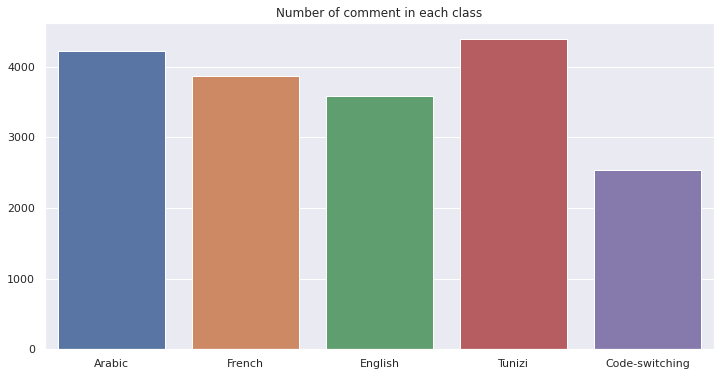

In [ ]:
#distribution
sns.set(rc={'figure.figsize':(12,6)})
#per_lang = final_scraped_data['labels'].value_counts()
sns.barplot(x=list(langage.values()), y=length).set(title='Number of comment in each class')

**Perfect!**

In [ ]:
#save data to .csv file
from pathlib import Path  
filepath = Path('/content/drive/MyDrive/My_work/NLP-Project-INSAT/to_model_data.csv') 
data.to_csv(filepath)